In [6]:
import numpy as np 
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\alexa\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['interactive']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:



##################  Long Call     ##############
price = np.arange(110,230,1) # the stock price at expiration date
strike = 160 # the strike price
premium = 15 # the option premium
# the payoff of Long Call position: max(S-X,0) where we include the premium here
payoff_long_call = [max(0, (i - strike))-premium for i in price]
plt.style.use('dark_background')
plt.figure(figsize=(20,11))
plt.plot(price, payoff_long_call, label = 'Long Call',linewidth=5)
# get line at origin
axhline(linewidth=2, color='b')

plt.legend(fontsize = 20)
plt.xlabel('Price of Underlying at Expiry', fontsize = 15)
plt.ylabel('Payoff',fontsize = 15)
plt.title('Long Call Strategy',fontsize = 20)
plt.grid(True,linewidth=0.2)
plt.text(2, 0.65, r'$\cos(2 \pi t) \exp(-t)$', fontdict=font)
plt.annotate('This is awesome!', 
             xy=(130, 0.75),  
             xycoords='data',
             textcoords='offset points',
             arrowprops=dict(arrowstyle="->")

#################### Short Call #############################
price = np.arange(110,230,1) # the stock price at expiration date
strike = 160 # the strike price
premium = 15 # the option premium
# the payoff of Short Call position is simply the inverse of the payoff of a Long Call
payoff_long_call = [max(0, (i - strike))-premium for i in price]
payoff_short_call = np.invert(payoff_long_call) # uses numpy's built ininvert function
plt.style.use('dark_background')
plt.figure(figsize=(20,11))
plt.plot(price, payoff_short_call, label = 'Short Call',linewidth=5)
plt.plot(price, payoff_long_call, label = 'Long Call',linewidth=5)

axhline(linewidth=2, color='b')

plt.legend(fontsize = 20)
plt.xlabel('Price of Underlying at Expiry', fontsize = 15)
plt.ylabel('Payoff',fontsize = 15)
plt.title('Long & Short Call Strategy',fontsize = 20)
plt.grid(True,linewidth=0.2)
call_put_flag = -1
####################   Long & Short Put     ###################
price = np.arange(110,230,1) # the stock price at expiration date
strike = 160 # the strike price
premium = 7.5 # the option premium
# the payoff of Long Put position: max(X-S,0) where we include the premium here

# payoff_long_put = [max(0, (strike - i)) - premium for i in price]
payoff_long_put = [max(0, call_put_flag*(i - strike))-premium for i in price]
payoff_short_put = [min(0, (i - strike))-premium*call_put_flag for i in price]


plt.style.use('dark_background')
plt.figure(figsize=(20,11))
plt.plot(price, payoff_long_put, label = 'Long Put',linewidth=5)
plt.plot(price, payoff_short_put, label = 'Short Put', linewidth =5)

axhline(linewidth=2, color='b')

plt.legend(fontsize = 20)
plt.xlabel('Price of Underlying at Expiry', fontsize = 15)
plt.ylabel('Payoff',fontsize = 15)
plt.title('Long & Short Put Strategy',fontsize = 20)

plt.grid(True,linewidth=0.2)

################### Covered Call  ####################
price = np.arange(110,230,1) # the stock price at expiration date
strike = 160 # the strike price
premium = 7.5 # the option premium
# the payoff of short call position
payoff_short_call = [min(0, -(i - strike))+premium for i in price]
# the payoff of long stock postion
payoff_long_stock = [i-strike for i in price]
# the payoff of covered call
payoff_covered_call = np.sum([payoff_short_call, payoff_long_stock], axis=0)
plt.style.use('dark_background')
plt.figure(figsize=(15,10))
plt.plot(price, payoff_short_call, label = 'short call',linewidth=5)
plt.plot(price, payoff_long_stock, label = 'long stock',linewidth=5)
plt.plot(price, payoff_covered_call, label = 'covered call', color='m', linewidth=8, linestyle='dashed')

axhline(linewidth=2, color='b')

plt.legend(fontsize = 20)
plt.xlabel('Price of Underlying at Expiry', fontsize = 15)
plt.ylabel('Payoff',fontsize = 15)
plt.title('Covered Call Strategy Payoff at Expiration',fontsize = 20)
plt.grid(True,linewidth=0.2)

############## Risk Reversal ###################

price = np.arange(90,230,1) # the stock price at expiration date
strike_put = 140 # the strike price
strike_call = 180 # the strike price
premium = 15 # the option premium
# the payoff of Long Call position: max(S-X,0) where we include the premium here
payoff_long_call = [max(0, (i - strike_call))-premium for i in price]
call_put_flag = -1
payoff_short_put = [min(0, (i - strike_put))-premium*call_put_flag for i in price]

payoff = np.sum([payoff_long_call,payoff_short_put], axis=0)

plt.style.use('dark_background')
plt.figure(figsize=(20,11))
plt.plot(price, payoff_long_call, label = 'Long Call',linewidth=5)
plt.plot(price, payoff_short_put, label = 'Short Put', linewidth =5)
plt.plot(price, payoff, label = 'Risk Reversal',linewidth=6, linestyle='dashed')
# get line at origin
axhline(linewidth=2, color='b')

plt.legend(fontsize = 20)
plt.xlabel('Price of Underlying at Expiry', fontsize = 15)
plt.ylabel('Payoff',fontsize = 15)
plt.title('Long Call Strategy',fontsize = 20)
plt.grid(True,linewidth=0.2)


def plot_rr(k_call, k_put,premium_call,premium_put): 
    price = np.arange(70,230,1) # the stock price at expiration date
# payoff for the long call
    payoff_long_call = [max(0, (i - k_call))-premium_call for i in price]
# payoff for the long put
    payoff_short_put = [min(0, (i - k_put))-premium_put*call_put_flag for i in price]
    payoff = np.sum([payoff_long_call, payoff_short_put], axis=0)
    plt.figure(figsize=(15,10))
    plt.plot(price, payoff_long_call, label = 'Long Call',linewidth=5)
    plt.plot(price, payoff_short_put, label = 'Long put',linewidth=5)
    plt.plot(price, payoff, label = 'Risk Reversal',linewidth=8, linestyle='dashed')
    plt.legend(fontsize = 20)
    plt.xlabel('Price of Underlying at Expiry',fontsize = 15)
    plt.ylabel('Payoff',fontsize = 15)
    plt.title('Long Strangle Payoff',fontsize = 20)
    plt.grid(True,linewidth=0.2)


############# Long Butterfly   ###################
price = np.arange(890,980,1)
# Suppose the undelying price at time 0 is 935
k_itm = 915 # the strike price of ITM call
k_otm = 955 # the strike price of OTM call
k_atm = 935 # the strike price of ATM call
premium_itm = 15 # the premium of ITM call
premium_otm = 25 # the premium of OTM call
premium_atm = 15 # the premium of ATM call
# payoff for the long ITM call position
payoff_itm_long = [max(-premium_itm, i-k_itm-premium_itm) for i in price]
# payoff for the long OTM call position
payoff_otm_long = [max(-premium_otm, i-k_otm-premium_otm) for i in price]
# payoff for the 2 short ATM call position
payoff_atm_short = [min(2*premium_atm, -2*(i-k_atm-premium_atm)) for i in price]
# payoff for Butterfly Spread Strategy
payoff = np.sum([payoff_itm_long,payoff_otm_long,payoff_atm_short], axis=0)
plt.figure(figsize=(15,10))
plt.plot(price, payoff_itm_long, label = 'Long ITM Call',linewidth=5)
plt.plot(price, payoff_otm_long, label = 'Long OTM Call',linewidth=5)
plt.plot(price, payoff_atm_short, label = 'Short 2 ATM Call',linewidth=5)
plt.plot(price, payoff, label = 'Long Call Butterfly Spread',linewidth=8, linestyle='dashed')

axhline(linewidth=2, color='b')

axvline(x=k_itm,linewidth=0.5, color='g')
axvline(x=k_otm,linewidth=0.5, color='g')
axvline(x=k_atm,linewidth=0.5, color='g')


plt.legend(fontsize = 20)
plt.xlabel('Stock Price at Expiry',fontsize = 15)
plt.ylabel('Payoff',fontsize = 15)
plt.title('Long Call Butterfly Spread Payoff',fontsize = 20)
plt.grid(True,linewidth=0.2)
################# Bull Call Spread #######################
price = np.arange(800,1100,1)
k_low = 900 # lower strike price for call
k_high = 1000 # higher strike price for call
premium_low = 20 # premium of call option with lower strike
premium_high = 2 # premium of call option with higher strike
# long call with lower strike
payoff_long_call = [max(-premium, i-k_low-premium_low ) for i in price]
# short call with higher strike
payoff_short_call = [min(premium, -(i-k_high-premium_high)) for i in price]
payoff = np.sum([payoff_long_call, payoff_short_call], axis=0)
plt.figure(figsize=(15,10))
plt.plot(price, payoff_long_call, label = 'long call')
plt.plot(price, payoff_short_call, label = 'short call')
plt.plot(price, payoff, label = 'Bull Call Spread',linewidth=6, linestyle='dashed')
plt.legend(fontsize = 20)
plt.xlabel('Price of Underlying at Expiry',fontsize = 15)
plt.ylabel('Payoff',fontsize = 15)
plt.title('Bull Call Spread Payoff at Expiration',fontsize = 20)
plt.grid(True,linewidth=0.2)


##################  Long Straddle ####################
price = np.arange(800,1000,1)
strike = 900 # strike price for both call and put
premium_call = 20 # premium of call option
premium_put = 10 # premium of put option
# payoff for the long call
payoff_long_call = [max(-premium_call, i-strike-premium_call) for i in price]
# payoff for the long put
payoff_long_put = [max(-premium_put, strike-i-premium_put) for i in price]
payoff = np.sum([payoff_long_call, payoff_long_put], axis=0)
plt.figure(figsize=(15,10))
plt.plot(price, payoff_long_call, label = 'Long Call')
plt.plot(price, payoff_long_put, label = 'long put')
plt.plot(price, payoff, label = 'Long Straddle',linewidth=6, linestyle='dashed')
plt.legend(fontsize = 20)
plt.xlabel('Price of Underlying at Expiry',fontsize = 15)
plt.ylabel('Payoff',fontsize = 15)
plt.title('Long Straddle Payoff',fontsize = 20)
plt.grid(True,linewidth=0.2)


################### Long Strangle ##################
price = np.arange(650,1000,1)
# Suppose the undelying price at time 0 is 830
k_call = 870 # The strike price of OTM call
k_put = 795 # The strike price of OTM put
premium_call = 8 # premium of call option
premium_put = 10 # premium of put option
# payoff for the long call
payoff_long_call = [max(0, (i - k_call))-premium_call for i in price]
# payoff for the long put
payoff_long_put = [max(0, call_put_flag*(i - k_put))-premium_put for i in price]
payoff = np.sum([payoff_long_call, payoff_long_put], axis=0)
plt.figure(figsize=(15,10))
plt.plot(price, payoff_long_call, label = 'Long Call')
plt.plot(price, payoff_long_put, label = 'Long put')
plt.plot(price, payoff, label = 'Long Strangle',linewidth=6, linestyle='dashed')
plt.legend(fontsize = 20)
plt.xlabel('Price of Underlying at Expiry',fontsize = 15)
plt.ylabel('Payoff',fontsize = 15)
plt.title('Long Strangle Payoff',fontsize = 20)
plt.grid(True,linewidth=0.2)


######################################
def plot_func(k_call, k_put,premium_call,premium_put): 
    price = np.arange(650,1000,1)
# payoff for the long call
    payoff_long_call = [max(0, (i - k_call))-premium_call for i in price]
# payoff for the long put
    payoff_long_put = [max(0, call_put_flag*(i - k_put))-premium_put for i in price]
    payoff = np.sum([payoff_long_call, payoff_long_put], axis=0)
    plt.figure(figsize=(15,10))
    plt.plot(price, payoff_long_call, label = 'Long Call')
    plt.plot(price, payoff_long_put, label = 'Long put')
    plt.plot(price, payoff, label = 'Long Strangle',linewidth=6, linestyle='dashed')
    plt.legend(fontsize = 20)
    plt.xlabel('Price of Underlying at Expiry',fontsize = 15)
    plt.ylabel('Payoff',fontsize = 15)
    plt.title('Long Strangle Payoff',fontsize = 20)
    plt.grid(True,linewidth=0.2)
interact(plot_func,
            k_call = widgets.FloatSlider(value=800,
                                               min=700.0,
                                               max=900.0,
                                               step=5.0),
            k_put = widgets.FloatSlider(value=800,
                                               min=700.0,
                                               max=900.0,
                                               step=5.0),
            premium_call = widgets.FloatSlider(value=15,
                                       min=1,
                                       max=50,
                                       step=0.5),
            premium_put = widgets.FloatSlider(value=7.5,
                                       min=1,
                                       max=50,
                                       step=0.5)) 

def call():
    price = np.arange(110,230,1) # the stock price at expiration date
    strike = 160 # the strike price
    premium = 15 # the option premium
    # the payoff of Long Call position: max(S-X,0) where we include the premium here
    payoff_long_call = [max(0, (i - strike))-premium for i in price]
    plt.style.use('dark_background')
    plt.figure(figsize=(20,11))
    plt.plot(price, payoff_long_call, label = 'Long Call',linewidth=5)
    # get line at origin
    axhline(linewidth=2, color='b')
    plt.legend(fontsize = 20)
    plt.xlabel('Price of Underlying at Expiry', fontsize = 15)
    plt.ylabel('Payoff',fontsize = 15)
    plt.title('Long Call Strategy',fontsize = 20)
    plt.grid(True,linewidth=0.2)
    return

SyntaxError: invalid syntax (<ipython-input-2-f7f8dc6a79e9>, line 34)

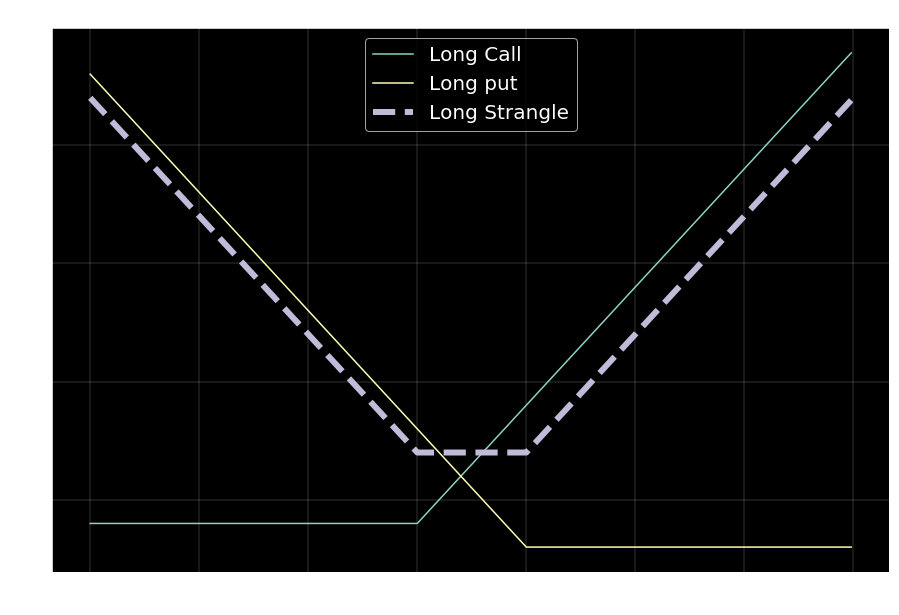

In [5]:
plot_func(800, 850, 10,20)

In [46]:
def call():
    price = np.arange(110,230,1) # the stock price at expiration date
    strike = 160 # the strike price
    premium = 15 # the option premium
    # the payoff of Long Call position: max(S-X,0) where we include the premium here
    payoff_long_call = [max(0, (i - strike))-premium for i in price]
    plt.style.use('dark_background')
    plt.figure(figsize=(20,11))
    plt.plot(price, payoff_long_call, label = 'Long Call',linewidth=5)
    # get line at origin
    axhline(linewidth=2, color='b')
    plt.legend(fontsize = 20)
    plt.xlabel('Price of Underlying at Expiry', fontsize = 15)
    plt.ylabel('Payoff',fontsize = 15)
    plt.title('Long Call Strategy',fontsize = 20)
    plt.grid(True,linewidth=0.2)

In [62]:
def butterfly():
    price = np.arange(890,980,1)
    # Suppose the undelying price at time 0 is 935
    k_itm = 915 # the strike price of ITM call
    k_otm = 955 # the strike price of OTM call
    k_atm = 935 # the strike price of ATM call
    premium_itm = 15 # the premium of ITM call
    premium_otm = 25 # the premium of OTM call
    premium_atm = 15 # the premium of ATM call
    # payoff for the long ITM call position
    payoff_itm_long = [max(-premium_itm, i-k_itm-premium_itm) for i in price]
    # payoff for the long OTM call position
    payoff_otm_long = [max(-premium_otm, i-k_otm-premium_otm) for i in price]
    # payoff for the 2 short ATM call position
    payoff_atm_short = [min(2*premium_atm, -2*(i-k_atm-premium_atm)) for i in price]
    # payoff for Butterfly Spread Strategy
    payoff = np.sum([payoff_itm_long,payoff_otm_long,payoff_atm_short], axis=0)
    plt.figure(figsize=(15,10))
    plt.plot(price, payoff_itm_long, label = 'Long ITM Call',linewidth=5)
    plt.plot(price, payoff_otm_long, label = 'Long OTM Call',linewidth=5)
    plt.plot(price, payoff_atm_short, label = 'Short 2 ATM Call',linewidth=5)
    plt.plot(price, payoff, label = 'Long Call Butterfly Spread',linewidth=8, linestyle='dashed')

    axhline(linewidth=2, color='b')

    axvline(x=k_itm,linewidth=0.5, color='g')
    axvline(x=k_otm,linewidth=0.5, color='g')
    axvline(x=k_atm,linewidth=0.5, color='g')


    plt.legend(fontsize = 20)
    plt.xlabel('Stock Price at Expiry',fontsize = 15)
    plt.ylabel('Payoff',fontsize = 15)
    plt.title('Long Call Butterfly Spread Payoff',fontsize = 20)
    plt.grid(True,linewidth=0.2)

In [63]:
def option_type(*args):
    for x in args:
        return x()   

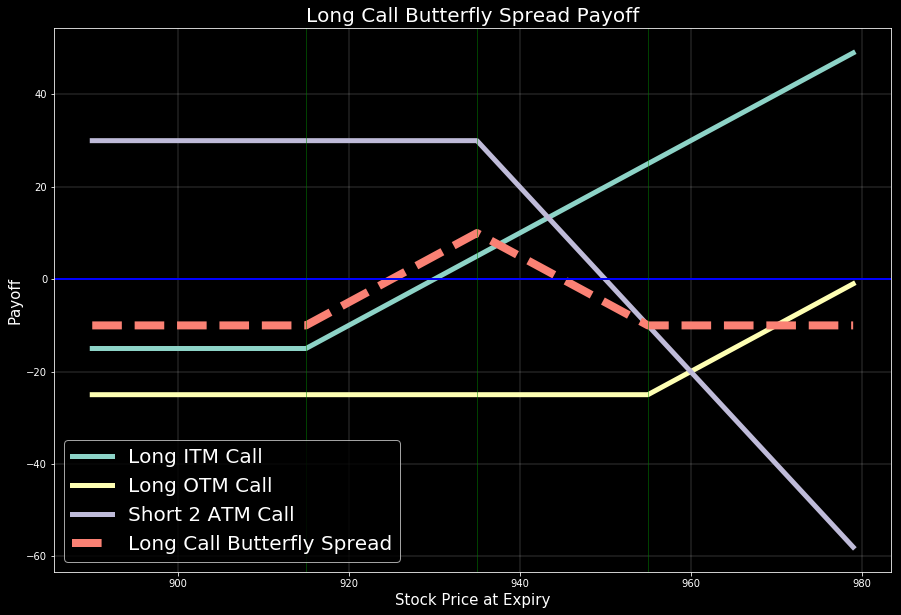

In [64]:
option_type(butterfly)

In [ ]:
class Option:
    # class object attribute: works no matter what instance I make
    

    # Circle gets instantiated with a radius (default is 1)
    def __init__(self, option=call):
        self.option = call

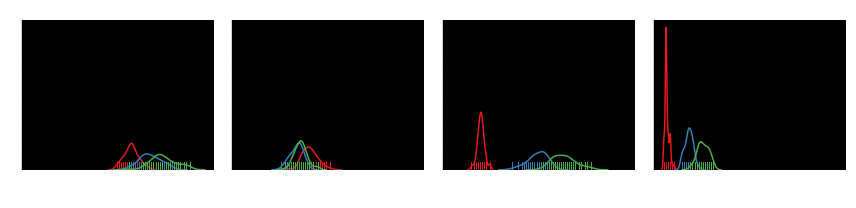

In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns

iris = load_iris()
iris = pd.DataFrame(data=np.c_[iris['data'], iris['target']], 
                    columns=iris['feature_names'] + ['target'])

# recast into long format 
df = iris.melt(['target'], var_name='cols',  value_name='vals')

df.head()

g = sns.FacetGrid(df, col='cols', hue="target", palette="Set1")
g = (g.map(sns.distplot, "vals", hist=False, rug=True))

In [10]:
import numpy as np 
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%pylab inline
%matplotlib inline
def risk_reversal(): 
    k_call = 870 # The strike price of OTM call
    k_put = 795 # The strike price of OTM put
    premium_call = 8 # premium of call option
    premium_put = 10 # premium of put option
    price = np.arange(70,230,1) # the stock price at expiration date
    call_put_flag = -1
# payoff for the long call
    payoff_long_call = [max(0, (i - k_call))-premium_call for i in price]
# payoff for the long put
    payoff_short_put = [min(0, (i - k_put))-premium_put*call_put_flag for i in price]
    payoff = np.sum([payoff_long_call, payoff_short_put], axis=0)

    interact(plot_rr,
                k_call = widgets.FloatSlider(value=150.0,
                                                   min=95.0,
                                                   max=200.0,
                                                   step=5.0
                                                   ),
                k_put = widgets.FloatSlider(value=150,
                                                   min=95.0,
                                                   max=200.0,
                                                   step=5.0),
                premium_call = widgets.FloatSlider(value=15,
                                           min=1,
                                           max=50,
                                           step=0.5),
                premium_put = widgets.FloatSlider(value=7.5,
                                           min=1,
                                           max=50,
                                           step=0.5))
   
#     plt.plot(price, payoff_long_call, label = 'Long Call',linewidth=5)
#     plt.plot(price, payoff_short_put, label = 'Long put',linewidth=5)
#     plt.plot(price, payoff, label = 'Risk Reversal',linewidth=8, linestyle='dashed')
#     plt.legend(fontsize = 20)
#     plt.xlabel('Price of Underlying at Expiry',fontsize = 15)
#     plt.ylabel('Payoff',fontsize = 15)
#     plt.title('Long Strangle Payoff',fontsize = 20)
#     plt.grid(True,linewidth=0.2)
#     plt.figure(figsize=(15,10))
#     plt.show()

Populating the interactive namespace from numpy and matplotlib


C:\Users\alexa\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['interactive', 'pylab', 'norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


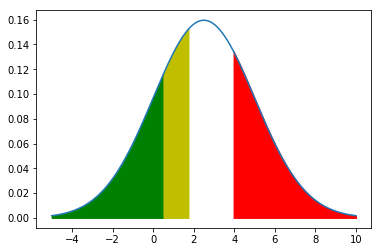

In [1]:
import math
import math
from decimal import Decimal
import numpy as np
import pandas as pd 

from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import pylab

import numpy as np 
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib inline

from scipy.stats import norm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import statsmodels.api as sm

from IPython.display import HTML, display


x = np.linspace(-5,10,1000)
y = norm.pdf(x, loc=2.5, scale=2.5)    # pass the mean and standard deviation as loc and scale
plt.plot(x,y)
plt.fill_between(x,y, where = x >=3.95, color='r')
plt.fill_between(x,y, where = x <=0.5, color='g')
plt.fill_between(x,y, where = (x<=1.75) & (x>=0.5), color='y')
plt.show()

In [2]:
def plot_rr(): 
    k_call = 870 # The strike price of OTM call
    k_put = 795 # The strike price of OTM put
    premium_call = 8 # premium of call option
    premium_put = 10 # premium of put option
    price = np.arange(70,230,1) # the stock price at expiration date
    call_put_flag = -1
    price = np.arange(70,230,1) # the stock price at expiration date
# payoff for the long call
    payoff_long_call = [max(0, (i - k_call))-premium_call for i in price]
# payoff for the long put
    payoff_short_put = [min(0, (i - k_put))-premium_put*call_put_flag for i in price]
    payoff = np.sum([payoff_long_call, payoff_short_put], axis=0)
    plt.figure(figsize=(15,10))
    plt.plot(price, payoff_long_call, label = 'Long Call',linewidth=5)
    plt.plot(price, payoff_short_put, label = 'Long put',linewidth=5)
    plt.plot(price, payoff, label = 'Risk Reversal',linewidth=8, linestyle='dashed')
    plt.legend(fontsize = 20)
    plt.xlabel('Price of Underlying at Expiry',fontsize = 15)
    plt.ylabel('Payoff',fontsize = 15)
    plt.title('Long Strangle Payoff',fontsize = 20)
    plt.grid(True,linewidth=0.2)

    interact(plot_rr,
            k_call = widgets.FloatSlider(value=150.0,
                                               min=95.0,
                                               max=200.0,
                                               step=5.0
                                               ),
            k_put = widgets.FloatSlider(value=150,
                                               min=95.0,
                                               max=200.0,
                                               step=5.0),
            premium_call = widgets.FloatSlider(value=15,
                                       min=1,
                                       max=50,
                                       step=0.5),
            premium_put = widgets.FloatSlider(value=7.5,
                                       min=1,
                                       max=50,
                                       step=0.5))

In [15]:
import numpy as np
price = np.arange(110,230,1) # the stock price at expiration date
